In [100]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [101]:
df=pd.read_csv('economic_index.csv')

In [102]:
df.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [103]:
print(df.columns)

Index(['Unnamed: 0', 'year', 'month', 'interest_rate', 'unemployment_rate',
       'index_price'],
      dtype='object')


In [104]:
df.drop(['Unnamed: 0','year','month'],axis=1,inplace=True)

In [105]:
df.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

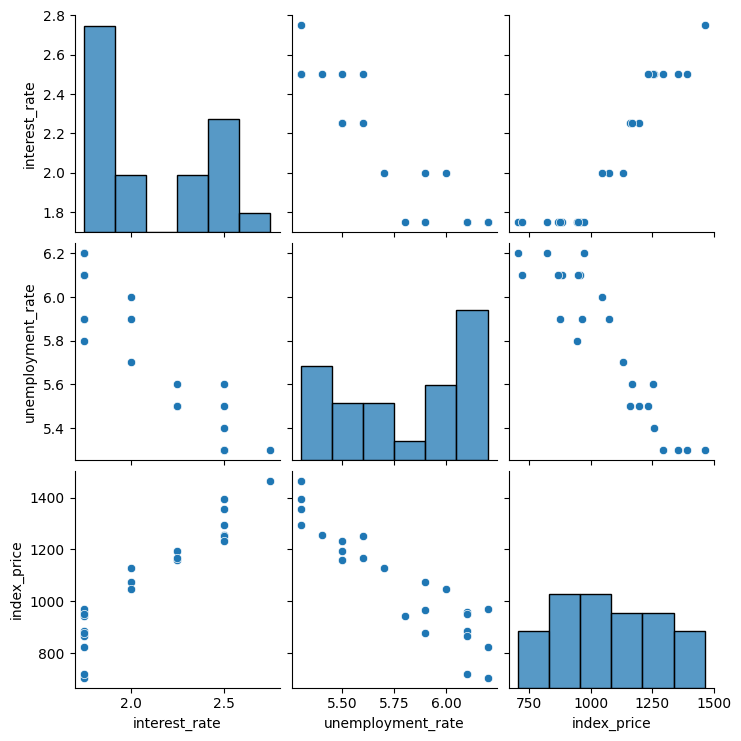

In [106]:
import seaborn as sns
sns.pairplot(df)

In [107]:
df.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


<Axes: >

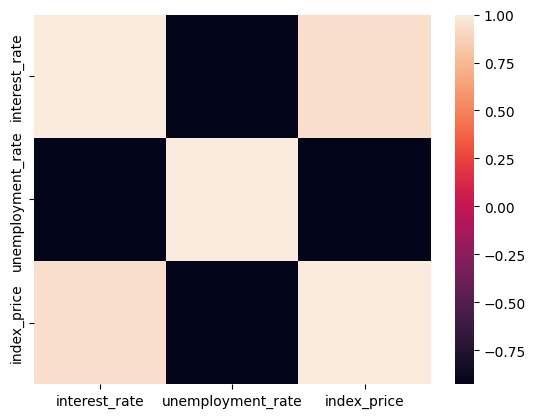

In [108]:
sns.heatmap(df.corr())

Text(0, 0.5, 'unemployment_rate')

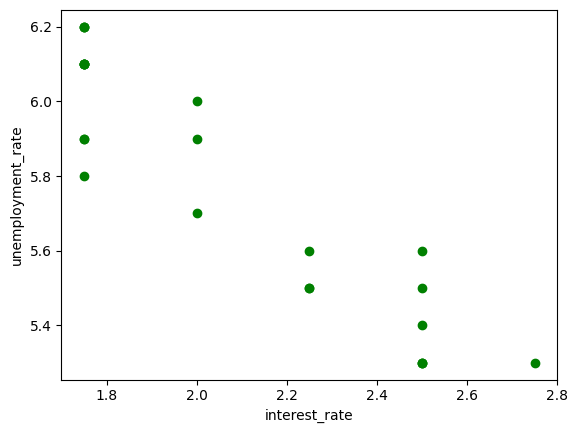

In [109]:
plt.scatter(df['interest_rate'],df['unemployment_rate'],color='g')
plt.xlabel('interest_rate')
plt.ylabel('unemployment_rate')

In [110]:
#Independent and dependent features
X=df[['interest_rate','unemployment_rate']]
y=df['index_price']

In [111]:
X

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4
5,2.50,5.6
6,2.50,5.5
7,2.25,5.5
8,2.25,5.5
9,2.25,5.6


In [112]:
y

0     1464
1     1394
2     1357
3     1293
4     1256
5     1254
6     1234
7     1195
8     1159
9     1167
10    1130
11    1075
12    1047
13     965
14     943
15     958
16     971
17     949
18     884
19     866
20     876
21     822
22     704
23     719
Name: index_price, dtype: int64

In [113]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)


In [114]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [115]:
X_train

array([[ 0.55339859, -0.53244666],
       [-0.9486833 ,  0.41597395],
       [ 1.30443953, -1.48086727],
       [-0.9486833 ,  1.36439457],
       [ 1.30443953, -0.53244666],
       [ 1.30443953, -1.48086727],
       [-0.19764235,  0.73211416],
       [-0.9486833 ,  1.04825436],
       [ 1.30443953, -1.48086727],
       [ 1.30443953, -1.16472707],
       [-0.9486833 ,  1.36439457],
       [-0.9486833 ,  1.04825436],
       [-0.9486833 ,  0.41597395],
       [-0.9486833 ,  1.04825436],
       [ 0.55339859, -0.84858687],
       [-0.19764235, -0.21630646],
       [-0.9486833 ,  0.09983375],
       [-0.9486833 ,  1.04825436],
       [ 1.30443953, -0.84858687]])

In [116]:
X_test

array([[ 0.55339859, -0.84858687],
       [-0.9486833 ,  1.36439457],
       [ 2.05548048, -1.48086727],
       [-0.9486833 ,  1.04825436],
       [-0.19764235,  0.41597395]])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

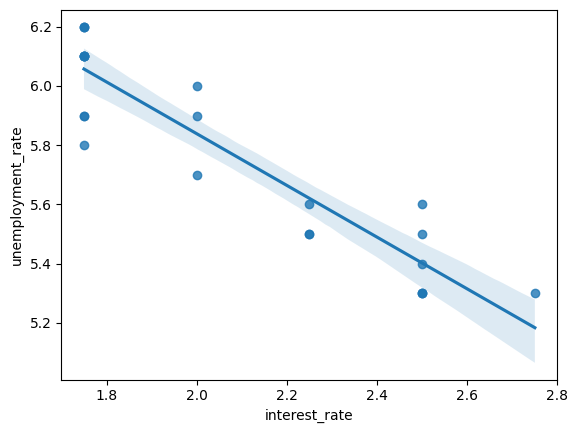

In [117]:
sns.regplot(x=df['interest_rate'],y=df['unemployment_rate'])

In [118]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()

In [119]:
model.fit(X_train,y_train)
print(model.coef_)

[  86.63351334 -114.04857249]


In [120]:
model

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [121]:
from sklearn.model_selection import cross_val_score
score=cross_val_score(model,X_train,y_train,scoring='neg_mean_absolute_error',cv=3)

In [122]:
score

array([-56.80595361, -84.48077319, -50.85615194])

In [123]:
np.mean(score)

np.float64(-64.0476262459588)

In [124]:
#prediction
y_pred=model.predict(X_test)

In [125]:
y_pred

array([1204.14403741,  821.62603274, 1406.38534684,  857.68137178,
        994.85736555])

In [126]:
## Performance Metrics
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [127]:
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

6957.105303258833
71.71878409976625
83.40926389351985


In [128]:

from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)
print(1-(1-score)*(len(y_test)-1)//(len(y_test)-X_test.shape[1]-1)
)

0.8254940547158576
1.0


### ##Assumption

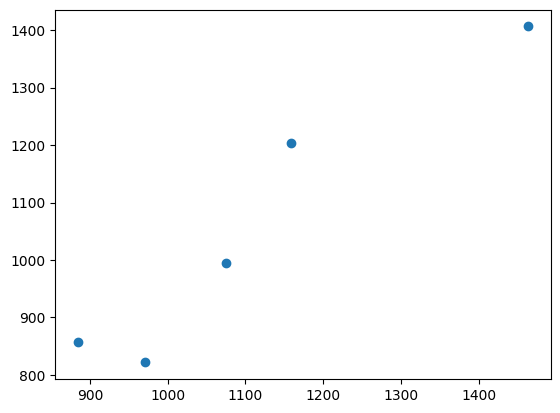

In [129]:
plt.scatter(y_test,y_pred)

In [130]:
residuals=y_test-y_pred
print(residuals)

8     -45.144037
16    149.373967
0      57.614653
18     26.318628
11     80.142634
Name: index_price, dtype: float64


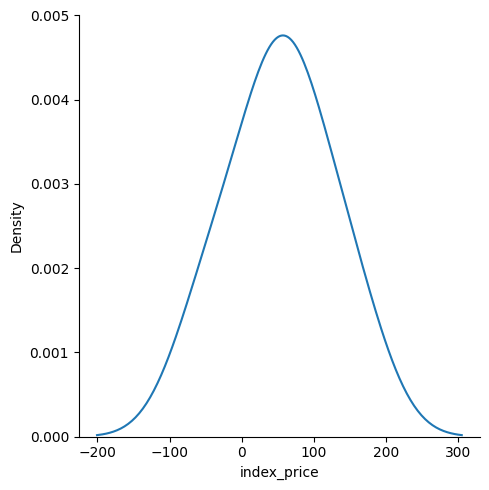

In [131]:
#Plot the residuals
sns.displot(residuals,kind='kde')

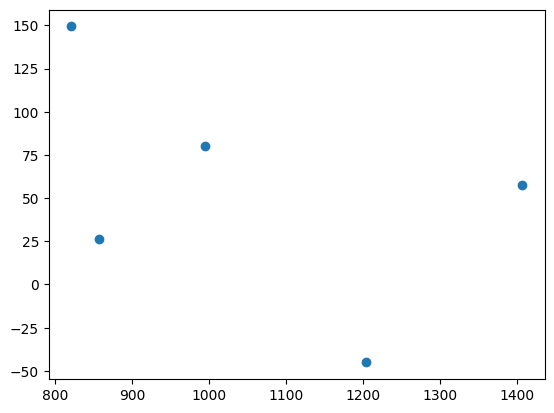

In [132]:
#Scatter plot with respect to the residuals
plt.scatter(y_pred,residuals)

In [133]:
import statsmodels.api as sm

model=sm.OLS(y_train,X_train).fit()
prediction=model.predict(X_test)
print(prediction)

[ 144.72298478 -237.7950199   346.96429421 -201.73968085  -64.56368708]


In [134]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:            index_price   R-squared (uncentered):                   0.033
Model:                            OLS   Adj. R-squared (uncentered):             -0.081
Method:                 Least Squares   F-statistic:                             0.2916
Date:                Sun, 24 Aug 2025   Prob (F-statistic):                       0.751
Time:                        22:44:57   Log-Likelihood:                         -159.34
No. Observations:                  19   AIC:                                      322.7
Df Residuals:                      17   BIC:                                      324.6
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [136]:
df.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [148]:
##Prediction for new data
model.predict(scaler.transform([[2.75, 5.3]]))


c:\UdemyFinal\DeepLearning_Project\venv\Lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([346.96429421])